# Introduction
This notebook lays out the code that you will use to begin your analysis with a single categorical variable. Copy and adapt this notebook to use for your project.


---



# Code

We start by importing some important features that we will use for statistics, data manipulation and graphing. You generally should **not** edit this code snippet. Also you should run this cell, by clicking on the "play" button before any of the any other code. 

In [1]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;

The next cell is where you import and "manage" the data. We are going to start to put all of this in "one" code-block. It makes the flow of the program easier to work with. Always run this second. 

In [2]:
addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'

# import the variables that we will use in the activity

myData = pd.read_csv(addhealth_url, usecols=['H4LM10','H4WS4'],low_memory=False)

# rename the first variable for the example. (you will have to add a line for the second variable)

myData.rename(columns={
    'H4LM10':'first_ftjob',
},inplace=True)

# deal with non-responses and the legit skip. In this case it makes sense to drop the legitamate skips. Put the second variable management here. 

myData['first_ftjob'].replace({
    8:np.nan,
    7:np.nan,
},inplace=True)

# Add the appropriate text lables for the categorical variable. Do the same for the second variable. 

myData['first_ftjob'].replace({
    1.0:"part of my long-term goals",
    2.0:"preparation for my long-term goals",
    3.0:"not related to my long-term goals",
    4.0:"did not have a long-term goals",
},inplace=True)
    

The main ways that we will describe the distribution of a single categorical variable is to use frequecy tables, proportions and barcharts. We will start with a basic freuqency table. 

In [3]:
myData['first_ftjob'].value_counts()

not related to my long-term goals     1526
did not have a long-term goals        1124
part of my long-term goals             633
preparation for my long-term goals     622
Name: first_ftjob, dtype: int64

To make a "relative" frequency table, we add the normalize=True argument. 

In [4]:
myData['first_ftjob'].value_counts(normalize=True)

not related to my long-term goals     0.390781
did not have a long-term goals        0.287836
part of my long-term goals            0.162100
preparation for my long-term goals    0.159283
Name: first_ftjob, dtype: float64

To create a bar chart, we will use the "countplot" commande. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'did not have a long-term goals'),
  Text(1, 0, 'not related to my long-term goals'),
  Text(2, 0, 'preparation for my long-term goals'),
  Text(3, 0, 'part of my long-term goals')])

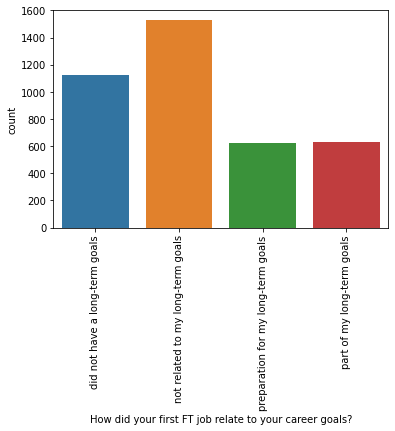

In [5]:
sb.countplot(data=myData, x='first_ftjob')
plt.xlabel("How did your first FT job relate to your career goals?")
plt.xticks(rotation=90)